## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
# Import Pandas and Numpy to deal with DataFrames and NaN
import pandas as pd
import numpy as np

# Import MatPlotLib and Seaborn to help visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Import os for file reader
import os

In [2]:
# Get current working directory
current_directory = os.getcwd()
print(current_directory)

/Users/brandonrose/Midterm_Project


In [3]:
# Pull the data from csv by concatenating current working directory with
# '/data/flights_10000.csv'
data = pd.read_csv(current_directory +'/data/flights_10000.csv')
passengers = pd.read_csv(current_directory +'/data/passengers_10000.csv')

In [4]:
data.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,...,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,...,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,...,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,...,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
data['no_name'].value_counts()

Series([], Name: no_name, dtype: int64)

In [6]:
data.columns

Index(['Unnamed: 0', 'fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [7]:
data.drop(['Unnamed: 0', 'no_name'], axis=1, inplace=True)

In [8]:
data.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,SAT,...,1.0,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,ORD,...,1.0,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,LAW,...,1.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,SAV,...,1.0,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,DTW,...,1.0,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN


## **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [9]:
# Isolate the rows that ONLY have an arrival or departure delay
delays_only_df = data[(data['arr_delay'] > 0) | (data['dep_delay'] > 0)].reset_index()

In [10]:
# Remove any non-numerical data
delays_only_df = delays_only_df.select_dtypes(include=np.number)

In [11]:
delays_only_df.head()

,index,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2,4221,4221,12891,11298,1034,1040.0,6.0,17.0,1057.0,...,1.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,957,957,11433,14908,841,840.0,-1.0,45.0,925.0,...,1.0,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN
2,7,2203,2203,10135,14761,1844,1923.0,39.0,8.0,1931.0,...,1.0,882.0,0.0,0.0,0.0,0.0,29.0,NaN,NaN,NaN
3,10,740,740,13495,12266,1558,1556.0,-2.0,23.0,1619.0,...,1.0,305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,417,417,10721,12478,1504,1517.0,13.0,13.0,1530.0,...,1.0,187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
delays_only_df.shape

(4319, 30)

In [13]:
#Drop first 5 columns
delays_only_df.drop(delays_only_df.columns[0:6], axis=1, inplace=True)
delays_only_df.shape

(4319, 24)

In [14]:
#Drop last 3 columns
delays_only_df.drop(delays_only_df.columns[-3:], axis=1, inplace=True)
delays_only_df.shape

(4319, 21)

In [15]:
#drop scheduled arrival time
delays_only_df.drop('crs_arr_time', axis=1, inplace=True)
delays_only_df.shape

(4319, 20)

In [16]:
#drop any cancelled or diverted rows of flights
delays_only_df.drop(delays_only_df[(delays_only_df['cancelled'] > 0) | (delays_only_df['diverted'] > 0)].index, inplace=True)
delays_only_df.shape

(4298, 20)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

delays_df_norm = pd.DataFrame(scaler.fit_transform(delays_only_df), columns=delays_only_df.columns)

In [19]:
delays_df_norm.fillna(0)

,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,-0.788059,-0.373564,-0.240533,-0.805285,-0.721817,0.551356,-0.684790,-0.344637,0.0,0.0,-1.189530,-1.148320,-1.204497,0.0,-1.130058,0.0000,0.000000,0.000000,0.000000,0.000000
1,-1.190197,-0.479028,1.939486,-1.069362,-0.844632,0.314529,-0.739097,-0.043934,0.0,0.0,2.091384,2.449075,2.141141,0.0,1.902921,-0.3375,-0.120191,0.455890,-0.032967,-0.548754
2,0.987384,0.123626,-0.941253,0.943227,1.061673,-0.159125,1.060053,-0.028898,0.0,0.0,-0.037143,-0.172075,0.007092,0.0,0.106465,-0.3375,-0.120191,-0.536289,-0.032967,0.033890
3,0.249459,-0.494094,0.226614,0.319044,0.353261,-0.277538,0.361065,-0.314567,0.0,0.0,-0.769248,-0.600018,-0.626238,0.0,-0.855090,0.0000,0.000000,0.000000,0.000000,0.000000
4,0.171042,-0.268099,-0.551964,0.140992,0.157469,-0.277538,0.168361,-0.449883,0.0,0.0,-0.864150,-1.014588,-0.915367,0.0,-1.051733,0.0000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,1.377458,0.168825,-0.551964,1.341343,1.113291,-0.514365,1.175675,-0.194285,0.0,0.0,-0.226948,-0.546525,-0.405949,0.0,-0.406809,-0.3375,-0.120191,-0.536289,-0.032967,-0.187113
4294,0.223320,-0.373564,-1.174827,0.177002,0.180608,-0.751192,0.184128,-0.510024,0.0,0.0,-1.135300,-1.241933,-0.984208,0.0,-0.993407,0.0000,0.000000,0.000000,0.000000,0.000000
4295,-0.824251,-0.433829,-0.240533,-0.841296,-0.226996,-0.395952,-0.211790,-0.525059,0.0,0.0,0.383140,0.295987,0.392598,0.0,0.664733,0.0000,0.000000,0.000000,0.000000,0.000000
4296,-1.630539,-0.479028,-0.006959,-1.637529,-1.248676,-0.395952,-1.217352,-0.314567,0.0,0.0,0.518715,0.657064,0.723031,0.0,0.089800,0.0000,0.000000,0.000000,0.000000,0.000000


In [20]:
delays_df_norm.drop('diverted', axis=1, inplace=True)

In [21]:
delays_df_norm.drop('cancelled', axis=1, inplace=True)

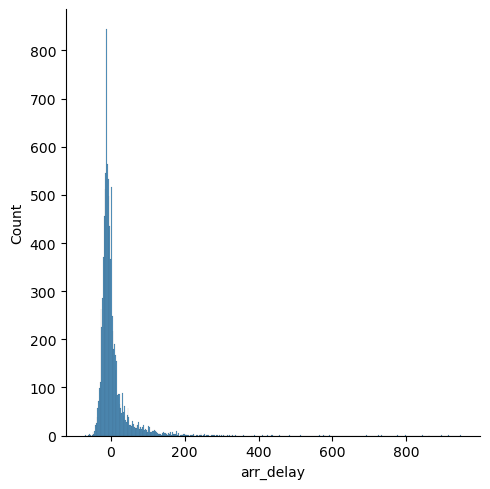

In [22]:
sns.displot(data, x='arr_delay')

In [23]:
delays_df_norm.describe()

,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,4.298000e+03,4.298000e+03,4.296000e+03,4.296000e+03,4.296000e+03,4.296000e+03,4.298000e+03,4.298000e+03,4.298000e+03,4.298000e+03,4.296000e+03,4298.0,4.298000e+03,1.852000e+03,1.852000e+03,1.852000e+03,1.852000e+03,1.852000e+03
mean,5.579529e-17,-4.959582e-18,-5.954269e-17,-5.458080e-17,-9.014101e-17,-5.292683e-17,-4.215644e-17,-1.239895e-17,-8.679268e-18,1.306023e-16,1.075076e-16,0.0,-3.554367e-17,-7.673248e-18,1.726481e-17,-1.966270e-17,-5.754936e-18,-1.438734e-17
std,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,0.0,1.000116e+00,1.000270e+00,1.000270e+00,1.000270e+00,1.000270e+00,1.000270e+00
min,-2.877169e+00,-7.050235e-01,-1.408400e+00,-2.917903e+00,-2.722458e+00,-8.696058e-01,-2.676644e+00,-1.066326e+00,-1.542025e+00,-1.509397e+00,-1.397249e+00,0.0,-1.251710e+00,-3.375005e-01,-1.201914e-01,-5.362886e-01,-3.296659e-02,-5.487544e-01
25%,-8.016307e-01,-4.488954e-01,-6.298219e-01,-8.172885e-01,-6.848832e-01,-5.143654e-01,-6.690234e-01,-4.348482e-01,-7.285751e-01,-7.304070e-01,-7.363827e-01,0.0,-7.467690e-01,-3.375005e-01,-1.201914e-01,-5.362886e-01,-3.296659e-02,-5.487544e-01
50%,3.230443e-02,-3.283645e-01,-3.183906e-01,8.897669e-02,1.450092e-01,-2.775384e-01,1.473388e-01,-2.995316e-01,-2.540627e-01,-2.389412e-01,-2.682688e-01,0.0,-2.868228e-01,-3.375005e-01,-1.201914e-01,-4.654186e-01,-3.296659e-02,-4.282072e-01
75%,8.104428e-01,6.336072e-02,3.044719e-01,7.931828e-01,8.356221e-01,7.770194e-02,8.288086e-01,7.634777e-02,4.238122e-01,4.297196e-01,4.201340e-01,0.0,4.114290e-01,-6.957687e-02,-1.201914e-01,1.369756e-01,-3.296659e-02,1.544375e-01
max,1.864046e+00,1.380388e+01,1.104885e+01,1.799477e+00,1.547594e+00,1.997116e+01,1.526045e+00,1.378843e+01,6.863623e+00,7.143074e+00,7.056337e+00,0.0,6.940666e+00,1.375826e+01,2.065922e+01,9.633544e+00,4.212022e+01,1.447946e+01


In [24]:
# delays_df_norm.drop('crs_elapsed_time', axis=1, inplace=True)

In [25]:
# delays_df_norm.drop('distance', axis=1, inplace=True)

<AxesSubplot:ylabel='Count'>

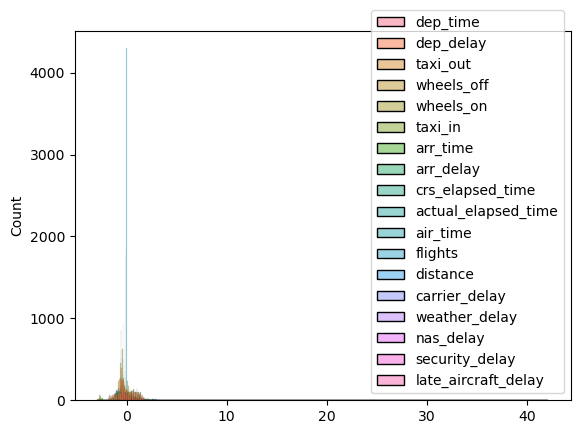

In [26]:
sns.histplot(delays_df_norm,)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [27]:
# List data columns for reference
data.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime'],
      dtype='object')

In [28]:
# First, we can convert the column dtype for the date from Object to datetime64
data['fl_date'] = pd.to_datetime(data['fl_date'])

In [29]:
# Create DF with year column, delay columns, diverted and cancellation
df_delays = data.loc[:, ['fl_date', 'dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'diverted', 'cancelled']]
df_delays.head(10)

,fl_date,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,diverted,cancelled
0,2018-07-10,-3.0,-2.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2019-10-10,-3.0,-9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2019-07-18,6.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2018-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
4,2018-10-24,-1.0,28.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0
5,2019-06-08,-2.0,-7.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
6,2018-01-29,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
7,2019-08-14,39.0,29.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0
8,2019-01-28,-11.0,-9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
9,2018-03-05,-5.0,-12.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [30]:
df_delays['fl_date'].dt.year.value_counts()

2019    5123
2018    4877
Name: fl_date, dtype: int64

In [31]:
# Check dtypes
df_delays.dtypes

fl_date                datetime64[ns]
dep_delay                     float64
arr_delay                     float64
carrier_delay                 float64
weather_delay                 float64
nas_delay                     float64
security_delay                float64
late_aircraft_delay           float64
diverted                      float64
cancelled                     float64
dtype: object

In [32]:
# We know everything is numeric, so we can fill NaN with 0s
df_delays = df_delays.fillna(0)

In [33]:
# Group by year, month. Calculate sum for the departure and arrival delay columns. Include delay type columns for more insight.
delays_grouped = df_delays.groupby([df_delays['fl_date'].dt.year.rename('Year'),
                                    df_delays['fl_date'].dt.month.rename('Month')])[['dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', ]].sum().reset_index()

In [34]:
#store the mean of our delay totals in a new column for each month
delays_grouped['month_delay_avg'] = delays_grouped[['dep_delay', 'arr_delay']].mean(axis=1)

In [35]:
#Sort DataFrame based on new month_delay_avg column in descending order
print("Delay Times in Minutes:")
delays_grouped[['Year', 'Month', 'month_delay_avg']].sort_values(['Year', 'month_delay_avg'], ascending=False)

Delay Times in Minutes:


,Year,Month,month_delay_avg
18,2019,7,6254.0
13,2019,2,5310.0
17,2019,6,4974.0
16,2019,5,4132.0
12,2019,1,3936.0
23,2019,12,3662.5
14,2019,3,3538.5
19,2019,8,3159.5
15,2019,4,2709.5
21,2019,10,2519.5


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [36]:
#Define a taxi dataframe that only has relevant information
#Drop NaN to remove cancellation flights
df_taxi = data.loc[:,['tail_num', 'dep_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'arr_time']].dropna().reset_index()

In [37]:
#Check head
df_taxi.head()

,index,tail_num,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,arr_time
0,0,N958WN,702.0,13.0,715.0,907.0,6.0,913.0
1,1,N68811,757.0,20.0,817.0,1131.0,8.0,1139.0
2,2,N694AE,1040.0,17.0,1057.0,1125.0,13.0,1138.0
3,4,N693DL,840.0,45.0,925.0,1056.0,11.0,1107.0
4,5,N250NN,1147.0,19.0,1206.0,1342.0,11.0,1353.0


In [38]:
# Import function that determines time of day based on arr_time and dep_time columns
from src.modules.data_preprocessing import time_of_day

In [39]:
#New column to categorize Morning, Afternoon, Evening, Nite
df_taxi['dep_time_of_day'] = df_taxi.apply(lambda df: time_of_day(df, method='dep'), axis=1)
df_taxi['arr_time_of_day'] = df_taxi.apply(lambda df: time_of_day(df, method='arr'), axis=1)

In [40]:
df_taxi.head()

,index,tail_num,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,arr_time,dep_time_of_day,arr_time_of_day
0,0,N958WN,702.0,13.0,715.0,907.0,6.0,913.0,Morning,Morning
1,1,N68811,757.0,20.0,817.0,1131.0,8.0,1139.0,Morning,Morning
2,2,N694AE,1040.0,17.0,1057.0,1125.0,13.0,1138.0,Morning,Morning
3,4,N693DL,840.0,45.0,925.0,1056.0,11.0,1107.0,Morning,Morning
4,5,N250NN,1147.0,19.0,1206.0,1342.0,11.0,1353.0,Morning,Afternoon


In [41]:
df_taxi['dep_time_of_day'].value_counts()

Morning      4026
Afternoon    2806
Evening      2188
Night         813
Name: dep_time_of_day, dtype: int64

In [42]:
#Add a counter column to return a count of flights in our groupby 
df_taxi['counter'] = 1

In [43]:
df_taxi.head()

,index,tail_num,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,arr_time,dep_time_of_day,arr_time_of_day,counter
0,0,N958WN,702.0,13.0,715.0,907.0,6.0,913.0,Morning,Morning,1
1,1,N68811,757.0,20.0,817.0,1131.0,8.0,1139.0,Morning,Morning,1
2,2,N694AE,1040.0,17.0,1057.0,1125.0,13.0,1138.0,Morning,Morning,1
3,4,N693DL,840.0,45.0,925.0,1056.0,11.0,1107.0,Morning,Morning,1
4,5,N250NN,1147.0,19.0,1206.0,1342.0,11.0,1353.0,Morning,Afternoon,1


In [44]:
departure_group = df_taxi.groupby('dep_time_of_day')[['taxi_out', 'counter']].sum().reset_index()

In [45]:
departure_group.sort_values('taxi_out', ascending=False)

,dep_time_of_day,taxi_out,counter
2,Morning,70834.0,4026
0,Afternoon,47708.0,2806
1,Evening,39977.0,2188
3,Night,13536.0,813


In [46]:
arrival_group = df_taxi.groupby('arr_time_of_day')[['taxi_in', 'counter']].sum().reset_index()

In [47]:
arrival_group.sort_values('taxi_in', ascending=False)

,arr_time_of_day,taxi_in,counter
2,Morning,23260.0,2892
0,Afternoon,20960.0,2867
1,Evening,17708.0,2239


### Our Findings
We found through this exploration that taxi times are longest in the mornings for both arrivals and departures. However, the data suggests that departure taxi times are higher overall, with the morning being considerable longer than the rest of our time of day data for both arrivals *and* departures. 
<br>
<br>
There does seem to be a considerable correlation with morning taxi times, as the highest count of flights based on time of day was over 4000 flights for morning departures, a good 1100 more than any other time of day for both arrivals and departures.

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [48]:
# New DF from data
flight_df = pd.read_csv('data/flights_10000.csv')
flight_df.shape

(10000, 43)

In [49]:
data['fl_date'].describe()

/var/folders/x9/6n919l0d4kz2zjx2vkr6n41w0000gn/T/ipykernel_7457/2443660879.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['fl_date'].describe()


count                   10000
unique                    730
top       2018-03-09 00:00:00
freq                       29
first     2018-01-01 00:00:00
last      2019-12-31 00:00:00
Name: fl_date, dtype: object

In [50]:
flight_df.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,...,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,...,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,...,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,...,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN


In [51]:
#columns for 
flight_df['year'] = data['fl_date'].dt.year
flight_df['month'] = data['fl_date'].dt.month

In [63]:
# define passenger data
pass_df = pd.read_csv('data/passengers_10000_ukachi.csv', index_col=0)
pass_df.shape

(10000, 38)

In [64]:
pass_df['year'].value_counts()

2019    10000
Name: year, dtype: int64

In [65]:
pass_df.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0.0,31.0,5115000.0,16089.0,11627.0,436143.0,0.0,8101.0,0.0,0.0,...,AE,United Arab Emirates,8,882,1,2019,3,17,F,IF
1,0.0,2.0,6900.0,16.0,4.0,0.0,0.0,191.0,126.0,108.0,...,US,United States,4,479,1,2019,3,1,L,DU
2,0.0,1.0,3450.0,8.0,1.0,0.0,0.0,211.0,66.0,54.0,...,US,United States,4,479,1,2019,3,1,L,DU
3,0.0,1.0,3450.0,8.0,1.0,0.0,0.0,472.0,102.0,90.0,...,US,United States,4,479,1,2019,3,1,L,DU
4,0.0,1.0,3450.0,8.0,2.0,0.0,0.0,123.0,54.0,42.0,...,US,United States,4,479,1,2019,3,1,L,DU


In [66]:
# data merge on common columns
busy_df = flight_df.merge(pass_df, how='inner', on=['origin_airport_id', 'dest_airport_id','year','month'])
busy_df.shape

(207, 79)

In [67]:
busy_df.columns

Index(['Unnamed: 0', 'fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin_x',
       'origin_city_name_x', 'dest_airport_id', 'dest_x', 'dest_city_name_x',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time_x', 'flights', 'distance_x',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'year', 'month', 'departures_scheduled',
       'departures_performed', 'payload', 'seats', 'passengers', 'freight',
       'mail', 'distance_y', 'ramp_to_ramp', 'air_time_y', 'unique_carrier',
       'airline_id', 'unique_carrier_name

In [68]:
origin_airports = busy_df.groupby(['origin_x', 'year', 'month']).sum()[['flights','passengers']]

In [69]:
print(origin_airports)

                     flights  passengers
origin_x year month                     
ABQ      2019 7          1.0       118.0
ANC      2019 1          3.0      1023.0
              7          8.0     12066.0
ATL      2019 1          1.0         0.0
              2          1.0         0.0
...                      ...         ...
SLC      2019 7          2.0       219.0
SMF      2019 7          1.0       118.0
STL      2019 8          1.0       160.0
TYS      2019 11         2.0        77.0
WRG      2019 7          1.0      2960.0

[92 rows x 2 columns]


In [70]:
origin_df = pd.DataFrame(origin_airports).sort_values(['flights','passengers'], ascending=False).head(10)

In [71]:
origin_df.rename(index={'origin_x':'airport'}, inplace=True)

In [72]:
origin_df

flights  passengers
origin_x year month                     
ATL      2019 7         28.0      4762.0
ANC      2019 7          8.0     12066.0
LAX      2019 7          7.0      6079.0
SEA      2019 7          7.0      4590.0
LAX      2019 8          7.0         0.0
SFO      2019 7          6.0      3393.0
LAX      2019 1          6.0        44.0
              2          6.0         0.0
ORD      2019 1          6.0         0.0
LAX      2019 11         5.0       102.0

In [ ]:
dest_airports = data.groupby('dest', as_index=False)['flights'].count()

In [ ]:
dest_df = pd.DataFrame(dest_airports).sort_values('flights', ascending=False).head(10)

In [ ]:
dest_df = dest_df.rename(columns={'dest':'airport'})

In [ ]:
dest_df

In [ ]:
#Concatenate into one df
airport_df = pd.concat([origin_df, dest_df]).groupby(['airport']).sum()

In [ ]:
airport_df

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?